## Simple calculation of Pi using direct Monte Carlo

This is a classical example of a direct sampling Monte Carlo calculation.

The algorithm is an implementation of Algorithm 1.1 from the book by W Krauth "Statistical Mechanics Algorithms and Computations" or exercise 5 pg. 145 of "Doing Math with Python".


In [1]:
# Here we import the mathematical library and the plots library
import numpy as np
import matplotlib.pyplot as plt

### Random generation of points

In this function we implement the calculation method

In [2]:
def mc_pi(total_random_points):
    #Create list to save x,y of points inside circle (xc,yc) and outside circle but inside square (xs,ys) 
    xc = []          #xc,yc punts dins del cercle
    yc = []             
    
    xs = []          #fora del cercle
    ys = []

    #---------------------------------------------------
    #Calculation
    i=0
    while (i<total_random_points):
        i=i+1
        #generate a random point
        x = np.random.uniform(-1.0, 1.0)
        y = np.random.uniform(-1.0, 1.0)

        #check whether it is inside circle (count and save for representation)
        if x**2 + y**2 <= 1.0:
            xc.append(x)  #el que fa el programa si es compleix la condició
            yc.append(y)
        else:
            xs.append(x)  #si no es compleix la condicio les dades es posen a la llista de punts fora del cercle
            ys.append(y)
    
    #return points
    return xc,yc,xs,ys
#---------------------------------------------------

### Plotting
Function: plot the square, the circle and the generated points (in different colors inside and outside) 

In [3]:
def plot(xc,yc,xs,ys):
    #create plot with the data and title
    plt.plot(xc,yc,'ro',markersize=1.0)
    plt.plot(xs,ys,'bo',markersize=1.0)
    plt.title('MC estimate of Pi')

    #Create axis with equal aspect ratio in both axis
    ax = plt.gca()
    ax.set_aspect('equal', 'box')

    #Set axis limits
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))

    #Add a circle
    circle_plot = plt.Circle( ( 0, 0 ), 1, color='green', linewidth=1.0, fill=False)
    ax.add_artist(circle_plot)

    #add black lines to show the different quadrants
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    #Show plot in screen
    plt.show()

    return xc,yc,xs,ys

## Calculation of Pi
The user enters the number of points and we calculate using this number


Enter number of points for Monte Carlo estimate of Pi?
> 1000


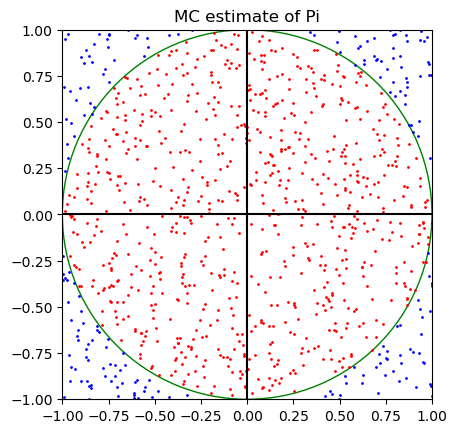


--------------

Result

Number of points inside square of area 4: 1000
Number of points inside unit circle: 799
Ratio unit circle/full square= 79.9 % 

Estimated Area of unit circle = 0.799 x 4 = 3.196
Exact value (pi): 3.141592653589793


In [4]:
# input total number of random points
total = int(input("\nEnter number of points for Monte Carlo estimate of Pi?\n>"))

#Calculate
xc,yc,xs,ys=mc_pi(total)

#Plot
plot(xc,yc,xs,ys)

# Print results (statistics)
print('\n--------------')
print('\nResult')
print('\nNumber of points inside square of area 4:', total)

# Number of points inside circle as compared with total
inside_circle=len(xc)
print('Number of points inside unit circle:',inside_circle)
circle_ratio = inside_circle /  total
print('Ratio unit circle/full square=',circle_ratio*100,'% \n')

#Pi estimate
pi_approx = 4.0*circle_ratio
print('Estimated Area of unit circle =',circle_ratio,'x 4 =', pi_approx)
print('Exact value (pi):', np.pi)